In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/train_outliers_removed.csv")

In [3]:
#with open("../DATA/Ames_Housing_Feature_Description.txt") as f:
 #   print(f.read())

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
##ID is unique column with just ID numbers, hence will drop this column

df=df.drop("Id", axis=1)

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
## Lets' fidn the precentage of Missing values
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan  

In [8]:
percent_nan = percent_missing(df)

In [9]:
len(percent_nan)

19

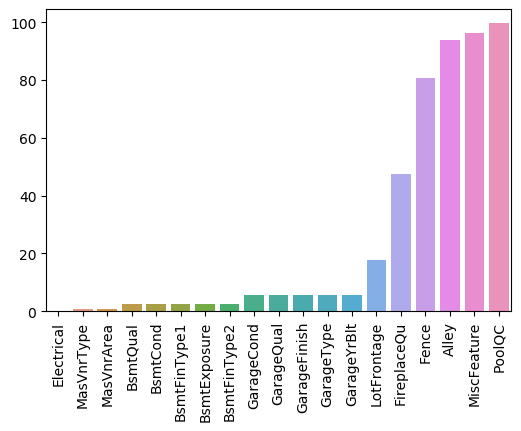

In [10]:
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [11]:
df.isna()["Electrical"].sum() ## Only one record where Electrical column is NULL, hence will drop this column

1

In [12]:
df = df.dropna(axis=0 , subset=["Electrical"])

In [13]:
percent_nan = percent_missing(df)

In [14]:
percent_nan [percent_nan <1]

MasVnrType    0.549073
MasVnrArea    0.549073
dtype: float64

In [15]:
##Finally let's fill MasVnrType and MasVnrArea with  as None and 0.

df['MasVnrType']=df['MasVnrType'].fillna('None')

df['MasVnrArea']=df['MasVnrArea'].fillna(0)

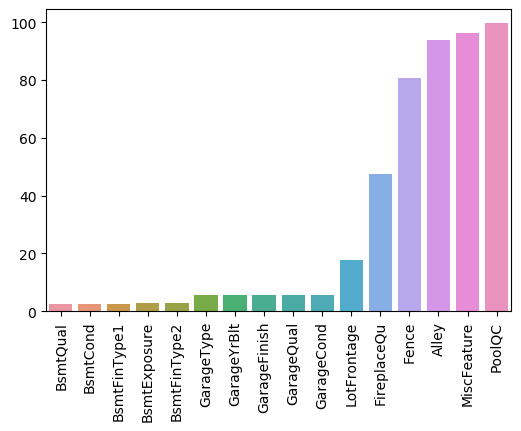

In [16]:
percent_nan = percent_missing(df)
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [17]:
##Will fill all these NULL Bsmt values with None

## Filling Categorical Columns with None
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

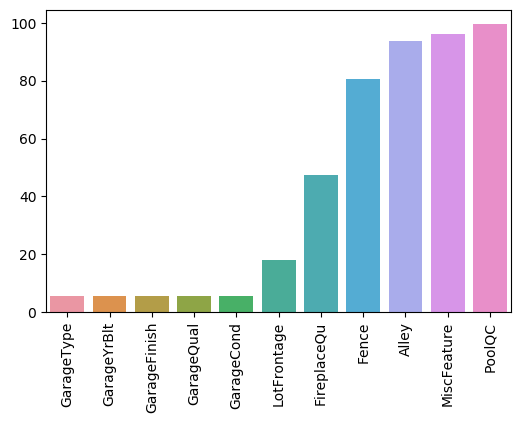

In [18]:
percent_nan = percent_missing(df)

plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [19]:
## Let's fill Garage realted columns with 0 and None

## None for categorical column
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

## 0 for Numerical Column
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

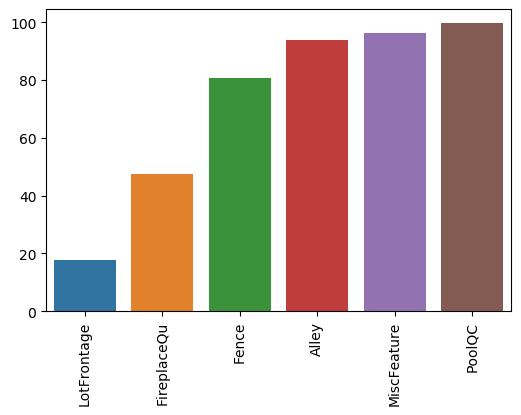

In [20]:
percent_nan = percent_missing(df)

plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [21]:
# Now out of these 6 columns, lets drop few which has more NULL values
df= df.drop(['PoolQC' , 'MiscFeature', 'Alley', 'Fence'],axis=1)

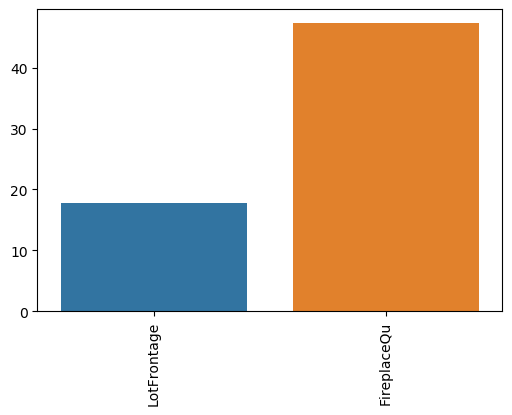

In [22]:
percent_nan = percent_missing(df)

plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x=percent_nan.index , y= percent_nan)
plt.xticks(rotation=90);
#plt.ylim(0,1);

In [23]:
df['FireplaceQu'].value_counts()

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
##Will replace Fireplace missing values with None

df["FireplaceQu"]= df["FireplaceQu"].fillna("None")

In [25]:
df["LotFrontage"]

#all are integers and are linked to Neighbours value

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1453    62.0
1454    85.0
1455    66.0
1456    68.0
1457    75.0
Name: LotFrontage, Length: 1457, dtype: float64

In [26]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda value:value.fillna(value.mean()))

In [27]:
df.isna().sum() 

## We have 3 records for Lot Frontage with value NULL , lets fill this with 0

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [28]:
df.to_csv("../DATA/train_NO_Missing_Data.csv", index=False)